# Multi-Layer Neural Network from Scratch

### Intro

Even after taking multiple courses on Neural Networks, it was still difficult for me to grasp why they work and how they work. However, after taking the _Applied Mathematical Computation_ course at my University, and implementing various mathematical concepts in Python code, I realized that I best learn by doing and implementing.

Thus, I decided to implement a Neural Network from scratch only purely Python and NumPy (which is just used to speed up the matrix computations). I was also really inspired by this awesome youtube video: [Building a neural network FROM SCRATCH](https://youtu.be/w8yWXqWQYmU). I used the MNIST dataset because simple, works well, and is used by many to get started with Neural Networks. 

A lot of time went into understanding the math behind Neural Networks, especially the Calculus of stochastic gradient descent. But, this was an awesome learning experience and gives meaning to what we are doing when we tune hyper-parameters. 

Neural Networks are essentially simplified just models of the human brain and it feels like interacting with alien technology, and that's just really cool! 

In the end, I was able to get a very good accuracy of 97.05%!

### Import Libraries

In [290]:
import numpy as np # only using numpy for computation speed up
import matplotlib.pyplot as plt # just for viewing images

### Load MNIST dataset

In [6]:
def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        # Read the file header
        magic_number = int.from_bytes(f.read(4), 'big')
        num_images = int.from_bytes(f.read(4), 'big')
        num_rows = int.from_bytes(f.read(4), 'big')
        num_cols = int.from_bytes(f.read(4), 'big')

        # Read the image data
        image_data = np.frombuffer(f.read(), dtype=np.uint8)
        image_data = image_data.reshape(num_images, num_rows, num_cols)

    return image_data

def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        # Read the file header
        magic_number = int.from_bytes(f.read(4), 'big')
        num_labels = int.from_bytes(f.read(4), 'big')

        # Read the label data
        label_data = np.frombuffer(f.read(), dtype=np.uint8)

    return label_data

In [7]:
# Load training images and labels
train_images = load_mnist_images('dataset/train-images-idx3-ubyte')
train_labels = load_mnist_labels('dataset/train-labels-idx1-ubyte')

# Load test images and labels
test_images = load_mnist_images('dataset/t10k-images-idx3-ubyte')
test_labels = load_mnist_labels('dataset/t10k-labels-idx1-ubyte')

Scale it down to 0 - 1 range

In [9]:
min_val, max_val = 0, 255
train = (train_images - min_val) / (max_val - min_val)
test = (test_images - min_val) / (max_val - min_val)

#### Define sigmoid activation, and derivative of sigmoid

In [292]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def der_sigmoid(x): # derivative
    return sigmoid(x) * (1 - sigmoid(x))

### Main Neural Network Class

Parameters for input layer, output layer, number of hidden layers, and activations in hidden layers (just same for all)

In [237]:
class MultiLayerNeuralNetwork:
    def __init__(self, input_layer=784, hidden_layer_count=2, hidden_layer=16, output_layer=10): 
        
        # initialize weights
        self.weights = [0] * (hidden_layer_count + 1)
        self.weights[0] = np.random.uniform(-1, 1, size=(hidden_layer, input_layer))
        self.weights[-1] = np.random.uniform(-1, 1, size=(output_layer, hidden_layer))

        for i in range(1, len(self.weights)-1):
            self.weights[i] = np.random.uniform(-1, 1, size=(hidden_layer, hidden_layer))
        
        # initialize biases
        self.biases = [0] * (hidden_layer_count + 1)
        self.biases[0] = np.random.uniform(-1, 1, size=(hidden_layer, 1))
        self.biases[-1] = np.random.uniform(-1, 1, size=(output_layer, 1))

        for i in range(1, len(weights)-1):
            self.biases[i] = np.random.uniform(-1, 1, size=(hidden_layer, 1))
            
        
    def train(self, imgs, labels, lr=0.01, epochs=5):
        tot = len(imgs)
            
        for epoch in range(epochs):
            count = 1

            for j in range(tot):
                img, label = imgs[j], labels[j]
                delta_w, delta_b = self.backward_prop(img, label)
                
                for i in range(len(self.weights)):
                    self.weights[i] -= lr * delta_w[i]
                    self.biases[i] -= lr * delta_b[i]

                print(f"Epoch {epoch}: {count}/{tot}", end="\r")
                count += 1
        
        
    def backward_prop(self, img, label):
        a, z = self.forward_prop(img)    
        y = np.zeros((out_activations, 1))
        y[label] = 1
        
        delta_w = [0] * len(self.weights)
        delta_b = [0] * len(self.biases)
        cur_delta_a = 2 * (a[-1] - y)
        
        for i in reversed(range(len(self.weights))):
            delta_b[i] = der_sigmoid(z[i]) * cur_delta_a # change in biases
            delta_w[i] = a[i].flatten() * delta_b[i] # change in weights
            cur_delta_a = np.dot(self.weights[i].T, delta_b[i]) # change in activations
        
        return delta_w, delta_b
        
    def forward_prop(self, img):
        a = [img.reshape(-1, 1)]
        z = []
        
        for i in range(len(self.weights)):
            z.append(np.dot(self.weights[i], a[i]) + self.biases[i])
            a.append(sigmoid(z[i]))
        
        return a, z
    
    def predict(self, img):
        a, z = self.forward_prop(img)
        return np.argmax(a[-1]), a[-1]
    
    def accuracy(self, imgs, labels):
        correct = 0
        count = 1
        tot = len(imgs)
        
        for i in range(tot):
            img, label = imgs[i], labels[i]
            predicted_label, res  = self.predict(img)
            
            cur_acc = round(correct / count, 5)
            print(f"Current Acc: {cur_acc} Count: {count}/{tot}", end="\r")
            
            if predicted_label == label: correct += 1
            count += 1
        
        acc = correct / tot
        err = 1 - acc
        print(f"Acc: {acc}\nError Rate: {err}")
        
        return correct / tot

In [238]:
mnn = MultiLayerNeuralNetwork(hidden_layer_count=3, hidden_layer=300)

In [241]:
mnn.train(train, train_labels, lr=0.1, epochs=10)

### Results

In [242]:
mnn.accuracy(test, test_labels)

Acc: 0.9705
Error Rate: 0.02949999999999997


0.9705

Was able to get __97.05%__ accuracy with an error rate of __2.95%__, some hyper-parameter tuning and transformations to training data, could lead to higher accuracy. Also, transformations could result in better practical accuracy, since the this is a very controlled enviornment.

## Testing with custom inputs

I just draw digits into _my_num.png_ file in Mac Previewer.

In [181]:
from PIL import Image

8


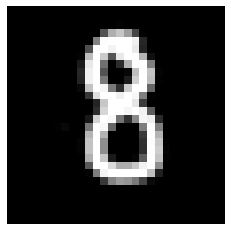

In [288]:
image_path = 'my_num.png'
image = Image.open(image_path).convert('L')
image = image.resize((28, 28))
image = np.array(image) / 255.0
plt.imshow(image, cmap='gray')
plt.axis('off')  # Optional: Turn off the axes
cur_res = mnn.predict(image)
print(cur_res[0])
plt.show()

In [289]:
np.round(cur_res[1], 3)

array([[0.   ],
       [0.   ],
       [0.   ],
       [0.135],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.999],
       [0.   ]])

### References

These are mostly just youtube videos.

1. [Building a neural network FROM SCRATCH (no Tensorflow/Pytorch, just numpy & math) by Samson Zhang](https://youtu.be/w8yWXqWQYmU)
2. [Neural networks series by 3Blue1Brown](https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) - Learned all the math from this series, highly recommend his videos, really changes your perspective on math.
3. [Derivative of the Sigmoid function](https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e)